## Boosting and Gradient Boosting
- **scikit-learn** implements gradient boosting algorithm for both regression and classification.
They are 
- GradientBoostingRegressor
- GradientBoostingClassifier

, both in the ensemble sub-package

In [1]:
import numpy as np
import pandas as pd
import sklearn.ensemble
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
dir(sklearn.ensemble)

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'IsolationForest',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'VotingClassifier',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_gradient_boosting',
 'bagging',
 'base',
 'forest',
 'gradient_boosting',
 'iforest',
 'partial_dependence',
 'voting_classifier',
 'weight_boosting']

In [3]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor


# In the following, we discuss GradientBoostingRegressor first
- We use the **Boston** housing data set to train our gradient boosting model
- We have discussed **Boston** dataset in the multiple linear regression lecture code

In [4]:
from sklearn import datasets
boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
Y = pd.Series(boston.target, name='price')

In [5]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [7]:
gbm = GradientBoostingRegressor()

## The Hyperparameters of Gradient Boosting Model
A boosting tree is an ensemble of trees, thus it inherits all the hyperparameters of decision trees

- max_depth: max tree height, default value 3
- max_leaf_nodes
- min_samples_leaf
- min_samples_split
- min_impurity_decrease
- min_impurity_split
- criterion: the criterion for tree splitting, defaulted to **friedman_mse**.    **friedman_mse** is the same as 
    **mse** (mean square error) when the loss function is chosen to be **ls** (least square)

As with all tree based model, boosting trees output 
- $feature\_importances\_$

On the other hand, there are **ensemble**-specific hyperparameters
- n_estimators: the number of trees, default value 100
- learning_rate: the shrinkage/discount factor, default value 0.1
- subsamples: the sample count in term of percentage used for a single tree training
- max_features: the integer or percentage count of the number of random feature selected for one tree node
    
Besides the regular **predict** method, the boosting tree has its own
- staged_predict: this method returns a generator. After kth next function call on the generator, 
    it spits out the predicted values after k-th boosting iteration
- estimators_: it stores all the n_estimators trees used in building the boosting tree ensemble    
                                                                                                            

In [8]:
dir(gbm)

['_SUPPORTED_LOSS',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_check_initialized',
 '_check_params',
 '_clear_state',
 '_decision_function',
 '_estimator_type',
 '_fit_stage',
 '_fit_stages',
 '_get_param_names',
 '_init_decision_function',
 '_init_state',
 '_is_initialized',
 '_make_estimator',
 '_resize_state',
 '_staged_decision_function',
 '_validate_estimator',
 '_validate_y',
 'alpha',
 'apply',
 'criterion',
 'feature_importances_',
 'fit',
 'get_params',
 'init',
 'lear

In [9]:
gbm.fit(X,Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [10]:
# R^2 of the fit
gbm.score(X,Y)

0.9751262076595276

- To visualize the iterative process, we can turn on the verbose parameter

In [11]:
gbm.set_params(verbose=1)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=1, warm_start=False)

In [12]:
gbm.fit(X,Y)

      Iter       Train Loss   Remaining Time 
         1          71.3103            0.13s
         2          60.6209            0.12s
         3          51.6402            0.11s
         4          44.3633            0.10s
         5          38.2660            0.09s
         6          33.2922            0.09s
         7          28.9209            0.08s
         8          25.2958            0.08s
         9          22.2518            0.08s
        10          19.6787            0.08s
        20           8.3137            0.06s
        30           5.4815            0.05s
        40           4.2538            0.04s
        50           3.5315            0.03s
        60           3.0790            0.02s
        70           2.7794            0.02s
        80           2.4949            0.01s
        90           2.2856            0.01s
       100           2.0998            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=1, warm_start=False)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# a train test split of 30% test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

In [15]:
gbm.set_params(learning_rate=0.01, n_estimators=500, verbose=1, subsample=0.7, warm_start=False, loss='ls', max_depth=2, max_features=2, min_impurity_decrease=0.01)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=2, max_features=2,
             max_leaf_nodes=None, min_impurity_decrease=0.01,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=0.7, verbose=1, warm_start=False)

In [16]:
# We see some over-fitting 
gbm.fit(X_train,Y_train)
print('-'*50)
print("The train set R^2 is %.3f" %(gbm.score(X_train, Y_train)))
print("The test set R^2 is %.3f" %(gbm.score(X_test,Y_test)))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1          77.8802           1.2469            0.40s
         2          76.9715           1.0718            0.38s
         3          76.0845           0.7344            0.36s
         4          78.4768           0.8929            0.34s
         5          86.1416           0.7840            0.34s
         6          74.4837           0.3654            0.34s
         7          74.3363           0.4638            0.33s
         8          81.9190           0.4007            0.32s
         9          72.2346           0.4289            0.32s
        10          71.5779           0.5006            0.31s
        20          64.4569           0.4289            0.23s
        30          63.9845           0.3039            0.21s
        40          61.4732           0.2762            0.19s
        50          59.4170           0.2904            0.18s
        60          51.8736           0.5159            0.17s
       

## How Do We Find Out the Trees Used in the Iterative Steps?
- We investigate the trees from the estimators_ attribute
- the tree subpackage has a built-in export_graphviz functionality

In [17]:
from sklearn import tree

In [18]:
import graphviz
def GenTreeData(treeNum):
            if treeNum >= gbm.n_estimators: raise ValueError('treeNum out of bound')
            tree.export_graphviz(gbm.estimators_[treeNum,0], out_file='temp.dot')
            with open("temp.dot") as f:
                    return f.read()

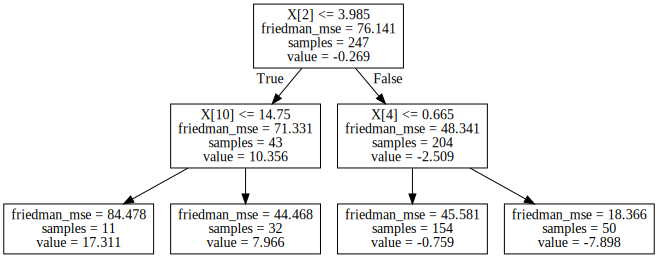

In [19]:
graphviz.Source(GenTreeData(10))

## How Do We Study the Changes of the Loss During the Iterations?
- We can use the **staged_predict** method for the iterative predictions

In [20]:
gbm.set_params(learning_rate=0.01, n_estimators=5000, max_depth=2, max_features=2, subsample=1.0, warm_start=False)
gbm.fit(X_train, Y_train)

      Iter       Train Loss   Remaining Time 
         1          83.9808            5.20s
         2          83.4339            4.19s
         3          82.8957            3.71s
         4          82.2973            3.55s
         5          81.1303            3.31s
         6          80.4554            3.15s
         7          79.9018            3.12s
         8          79.3447            2.99s
         9          78.8572            2.89s
        10          77.7493            2.80s
        20          72.1227            1.89s
        30          64.8477            1.60s
        40          59.6347            1.47s
        50          54.7253            1.40s
        60          51.1672            1.33s
        70          47.5860            1.29s
        80          44.0860            1.25s
        90          40.7150            1.22s
       100          38.4553            1.20s
       200          22.5252            1.07s
       300          14.7916            1.02s
       40

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=2, max_features=2,
             max_leaf_nodes=None, min_impurity_decrease=0.01,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=5000, presort='auto', random_state=None,
             subsample=1.0, verbose=1, warm_start=False)

In [21]:
from sklearn.metrics import r2_score
# The staged_predict returns generators

gen_train = gbm.staged_predict(X_train)
gen_test  = gbm.staged_predict(X_test)

trainR2 = []
testR2  = []
steps   = range(1,5000)
for n in steps:
    y_pred_train = next(gen_train)
    y_pred_test  = next(gen_test)
    trainR2.append(r2_score(y_pred_train, Y_train))
    testR2.append(r2_score(y_pred_test, Y_test))

- Because the individual tree is a weak learner, the initial $R^2$ is very negative (much worse than the null model)

Text(0,0.5,'$R^2$')

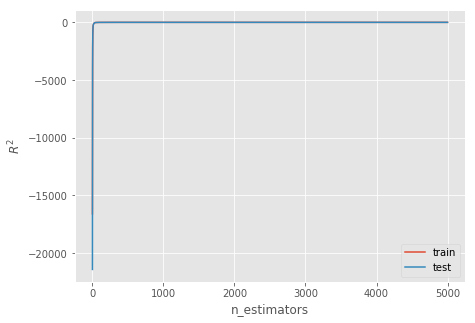

In [22]:
plt.rcParams['figure.figsize'] = (7,5)
start = 0
plt.plot(steps[start:], trainR2[start:], label='train')
plt.plot(steps[start:], testR2[start:], label='test')
plt.legend(loc=4)
plt.xlabel('n_estimators')
plt.ylabel(r'$R^2$')

Text(0,0.5,'$R^2$')

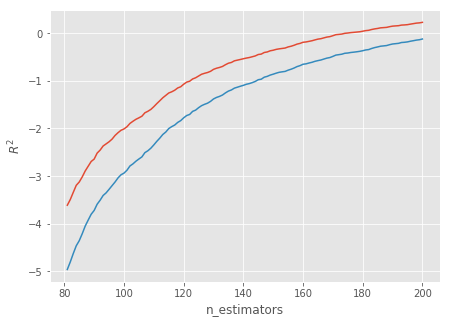

In [23]:
start = 80
end   = 200
plt.plot(steps[start:end], trainR2[start:end],label='train')
plt.plot(steps[start:end], testR2[start:end],label='test')
plt.xlabel('n_estimators')
plt.ylabel(r'$R^2$')

- We find that there is a signaficant over-fitting for this particular choice of hyperparameter
- We will need to do a grid-search to minimize the over-fit

Text(0,0.5,'$R^2$')

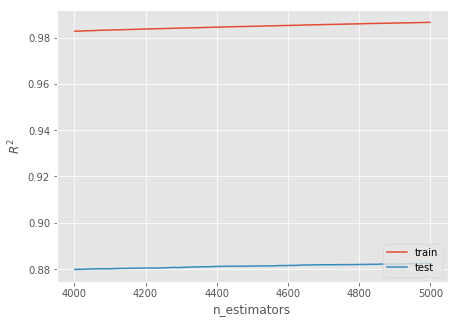

In [24]:
start = 4000
plt.plot(steps[start:], trainR2[start:],label='train')
plt.plot(steps[start:], testR2[start:],label='test')
plt.legend(loc=4)
plt.xlabel('n_estimators')
plt.ylabel(r'$R^2$')

- At 500 trees, we can investigate the feature importance of gbm

In [25]:
sorted_importance = sorted(zip(boston.feature_names, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('RM', 0.15457926775667108),
 ('LSTAT', 0.14120197655343944),
 ('DIS', 0.11935775255575409),
 ('CRIM', 0.11182946590551819),
 ('AGE', 0.09873098927854043),
 ('NOX', 0.07631029020664082),
 ('B', 0.07618243665487907),
 ('TAX', 0.0570163300907494),
 ('INDUS', 0.05643891833830189),
 ('PTRATIO', 0.05556363420600612),
 ('RAD', 0.026562906119479975),
 ('ZN', 0.02046424657597887),
 ('CHAS', 0.005761785758040486)]

Text(0.5,1,'Feature Importance Plot of 500-Tree GBM')

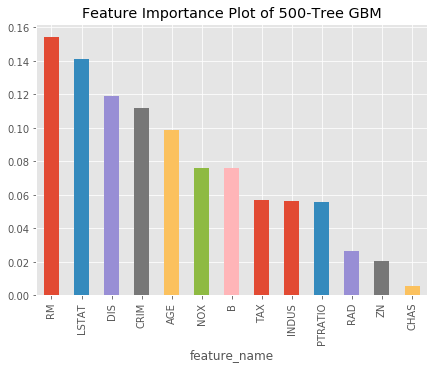

In [26]:
a, b = zip(*sorted_importance) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Feature Importance Plot of 500-Tree GBM')

## The Feature Importance Varying Against the Number of Trees
- In the above analysis, we only investigate the feature importance scores for the final model
- It would be interesting to investigate the variations of these feature importances against the growth of number of trees
- We will need to store the intermidiate gbm models when we vary the n_estimators
- To do so properly, we will need to use the package **copy** and its **deepcopy** function

In [27]:
from copy import deepcopy

gbm_models   = []
warm_start   = False
steps        = list(range(1,501,50))

for n_estimators in steps:
                gbm.set_params(n_estimators=n_estimators, learning_rate=0.1, warm_start=warm_start)
                gbm_models.append(deepcopy(gbm.fit(X_train, Y_train))) 
                warm_start = True

      Iter       Train Loss   Remaining Time 
         1          76.7252            0.00s
      Iter       Train Loss   Remaining Time 
         2          72.4651            0.03s
         3          68.7269            0.02s
         4          60.7193            0.02s
         5          54.6790            0.02s
         6          48.9540            0.02s
         7          46.0104            0.02s
         8          42.0399            0.02s
         9          40.6783            0.02s
        10          37.0336            0.02s
        11          35.3088            0.02s
        21          20.9520            0.01s
        31          14.1936            0.01s
        41          10.4621            0.00s
        51           8.7899            0.00s
      Iter       Train Loss   Remaining Time 
        52           8.5587            0.02s
        53           8.3873            0.02s
        54           8.3243            0.02s
        55           8.1075            0.02s
       

In [28]:
boston_importance = pd.DataFrame([model.feature_importances_ for model in gbm_models], index=steps, columns=X_train.columns)
boston_importance

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.399101,0.000000,0.031948,0.568951
51,0.095149,0.013590,0.042275,0.014015,0.114070,0.187704,0.021611,0.062741,0.028151,0.054516,0.115310,0.040313,0.210556
101,0.114314,0.016981,0.059622,0.007489,0.082749,0.183572,0.015798,0.098060,0.042617,0.071517,0.072276,0.052574,0.182430
151,0.119821,0.020544,0.057569,0.009902,0.104195,0.160931,0.028497,0.107413,0.050429,0.075322,0.054832,0.057981,0.152565
201,0.123591,0.019772,0.065577,0.009455,0.107036,0.145131,0.038011,0.104809,0.044241,0.084114,0.045291,0.063999,0.148973
251,0.126954,0.021573,0.063156,0.010306,0.112694,0.136905,0.043665,0.111717,0.038366,0.083047,0.045785,0.067591,0.138239
301,0.131524,0.024070,0.062882,0.008594,0.102589,0.128151,0.056454,0.117218,0.038972,0.086873,0.043552,0.064554,0.134567
351,0.132329,0.022741,0.062542,0.007370,0.095523,0.127412,0.069587,0.117513,0.035063,0.083084,0.046813,0.071573,0.128451
401,0.133789,0.021052,0.062012,0.007525,0.098055,0.124328,0.074090,0.119395,0.032256,0.078986,0.052657,0.071160,0.124695
451,0.132037,0.019047,0.061754,0.007744,0.094891,0.121848,0.078220,0.126119,0.029352,0.076564,0.053518,0.073253,0.125654


Text(0,0.5,'feature importance')

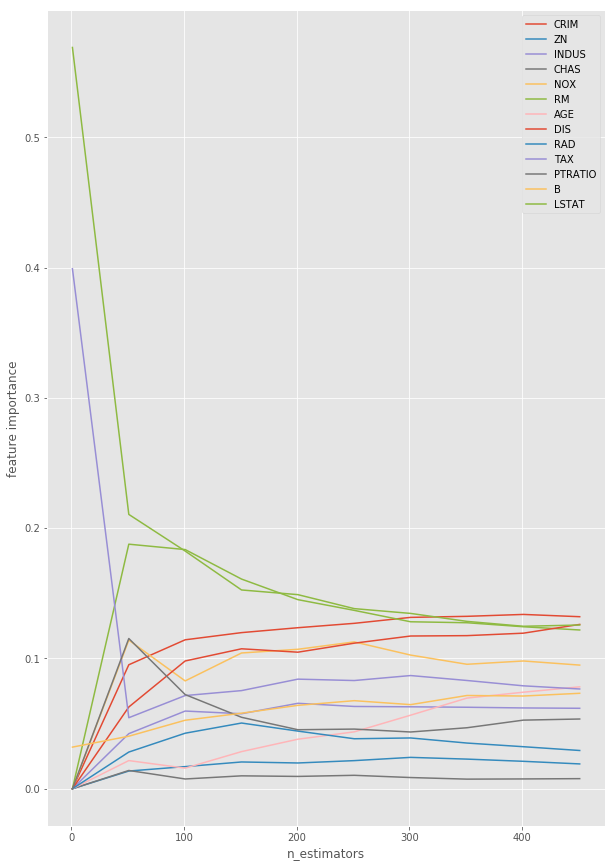

In [29]:
plt.rcParams['figure.figsize'] = (10,15)
for feature in boston_importance.columns:
    plt.plot(boston_importance.index, boston_importance[feature], label=feature)
plt.legend(loc=1)    
plt.xlabel('n_estimators')
plt.ylabel('feature importance')

## Gradient Boosting Classifier
- Besides all the hyperparameters/methods with regression boosting trees, it has its own
**staged_predict_proba** to output the per-class probabilities as a generator
- We will demonstrate the usage of gbm classifier using UCI credit-card default prediction data

In [30]:
cards = pd.read_csv('./UCI_Credit_Card.csv')

In [31]:
print(cards.columns)
cards.head()

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## The columns of the UCI credit card default data
- ID: sample id
- LIMIT_BAL: credit limit
- SEX: gender
- EDUCATION: 1-6, 1 for graduate school, lower means higher education
- MARRIAGE: 1/married, 2/single, 3/others
- AGE
- PAY_i: the months of past due, -1 for paying on time
- BILL_AMTi: the bill of the previous ith month
- PAY_AMTi: the payment of the previous ith month
- default.payment.next.month: whether the card holder defaults the next month, this is the target
    
the data was collected in 2005 in Taiwan for half a year duration. It has 30000 sample points, which is highly imbalanced.    

In [32]:
cards['default.payment.next.month'].value_counts()  # default vs non-default is about 1:4

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [33]:
X = cards.drop('default.payment.next.month', axis=1)
Y = cards['default.payment.next.month']
gbm_c = GradientBoostingClassifier()
gbm_c.fit(X,Y)
gbm_c.score(X,Y)

0.8249666666666666

- The high accuracy mostly comes from predicting the majority class, which is trivial

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, gbm_c.predict(X))

array([[22262,  1102],
       [ 4149,  2487]])

## Up-Sampling the Minority Class
- One technique to train an imbalanced classification model is to fabricate synthesized minority class data, knowning as
**up-sampling**. Up-sampling bootstraps only the minority class samples to make the major:minor ratio more balanced

In [35]:
from sklearn.utils import resample
minorIndex = cards[cards['default.payment.next.month']==1].ID.values
minorIndex

array([    1,     2,    14, ..., 29998, 29999, 30000])

In [36]:
resampled = resample(minorIndex, n_samples = 23364-6636)
LEFT = pd.DataFrame(list(cards.ID) + list(resampled), columns=['INDEX'])
LEFT.shape

(46728, 1)

In [37]:
cards2 = pd.merge(LEFT, cards, how='left', left_on ='INDEX', right_on='ID')

In [38]:
X = cards2.drop(['default.payment.next.month','ID','INDEX'],axis=1)
Y = cards2['default.payment.next.month']

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [40]:
np.random.seed(50)
gbm_c.set_params(learning_rate=0.01, n_estimators=3000, max_depth=2, subsample=0.3, max_features=3, verbose=0)
gbm_c.fit(X_train, Y_train)
print('Training Accuracy %.2f' %(gbm_c.score(X_train, Y_train)))
print('Testing Accuracy %.2f' %(gbm_c.score(X_test, Y_test)))

Training Accuracy 0.73
Testing Accuracy 0.73


In [41]:
print(confusion_matrix(Y_train, gbm_c.predict(X_train)))

[[13137  3229]
 [ 5698 10645]]


In [42]:
print(confusion_matrix(Y_test, gbm_c.predict(X_test)))

[[5602 1396]
 [2421 4600]]


## Barplot of Feature Importance

In [43]:
importance = sorted(list(zip(X_train.columns, list(gbm_c.feature_importances_))), key=lambda t:t[1], reverse=True)

Text(0.5,1,'feature importance of a gbm classifier')

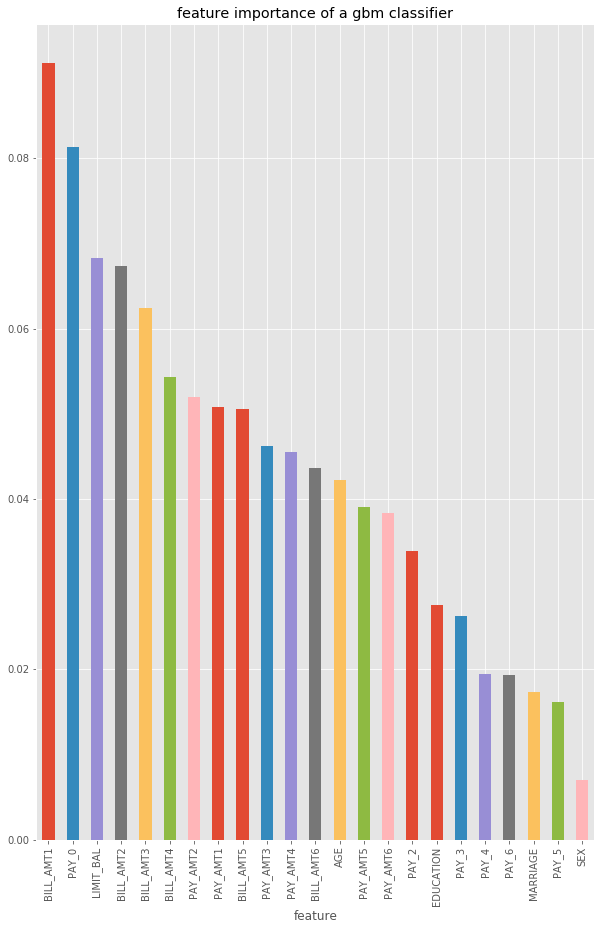

In [44]:
a, b = zip(*importance)
importance_score = pd.DataFrame({'feature':a, 'score':b})
importance_score.plot.bar(x='feature', y='score', legend=None)
plt.title('feature importance of a gbm classifier')

## The Accuracy Plot Against the Variation of n_estimators- We would like to study the changes of train/test accuracy for an increasing number of trees

In [45]:
gbm_c.set_params(learning_rate=0.01, n_estimators=10000, max_depth=2, subsample=0.3, max_features=3, verbose=0, warm_start=False)
gbm_c.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=2,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10000,
              presort='auto', random_state=None, subsample=0.3, verbose=0,
              warm_start=False)

In [46]:
from sklearn.metrics import accuracy_score
train_accuracy = []
test_accuracy  = []

gen_train = gbm_c.staged_predict(X_train)  # generator
gen_test  = gbm_c.staged_predict(X_test)   # generator
steps     = range(1,10001)

for n_estimators in steps:
            staged_Y_predict_train = next(gen_train)
            staged_Y_predict_test  = next(gen_test)
            train_accuracy.append(accuracy_score(Y_train, staged_Y_predict_train))  
            test_accuracy.append(accuracy_score(Y_test, staged_Y_predict_test))

The last n_estimators overfit at 4454


Text(0,0.5,'Accuracy')

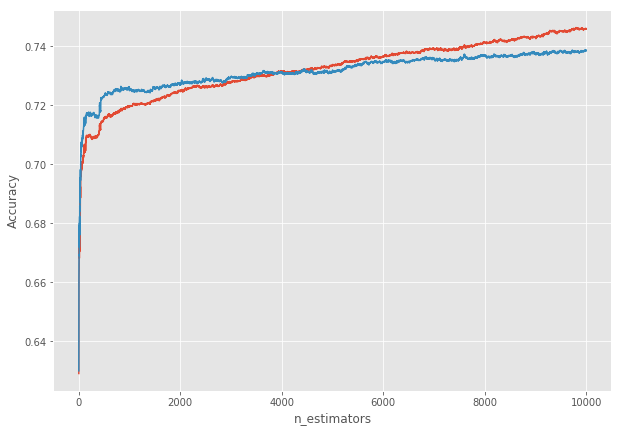

In [47]:
plt.rcParams['figure.figsize'] = (10,7)
plt.plot(steps, train_accuracy, label='train_accuracy')
plt.plot(steps, test_accuracy, label='test_accuracy')
underfitting  = np.array(train_accuracy) - np.array(test_accuracy) < 0
last_underfit = np.max(np.array(steps)[underfitting])
print('The last n_estimators overfit at %d' %(last_underfit))
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

Text(0,0.5,'Accuracy')

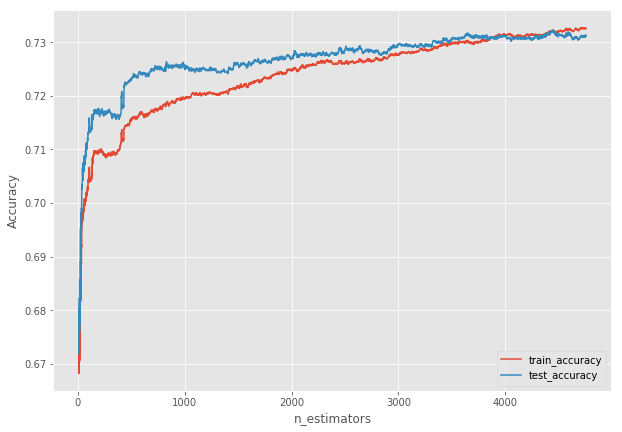

In [48]:
# To investigate what happens near this, we go beyond it for another 300 steps
loc = last_underfit+300
plt.plot(steps[10:loc], train_accuracy[10:loc], label='train_accuracy')
plt.plot(steps[10:loc], test_accuracy[10:loc], label='test_accuracy')
plt.legend(loc=4)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

- As before, we can investigate the variations of the feature importances when the tree ensemble grows
- As in the regression setting, we need to collect the intermediate models through **deepcopy**

In [49]:
steps = range(1, 2000, 100)
warm_start = False
gbm_models = []
for n_estimators in steps:
        gbm_c.set_params(warm_start=warm_start, n_estimators=n_estimators)
        gbm_models.append(deepcopy(gbm_c.fit(X_train, Y_train))) # deepcopy is essential, otherwise it will store many
        # copies of the references to the same model

Text(0,0.5,'feature importance')

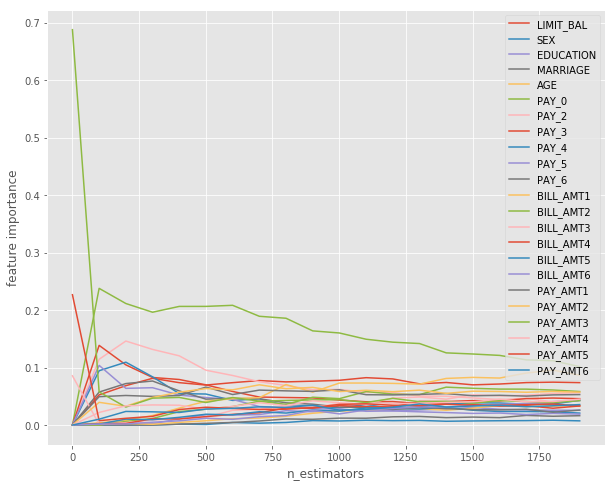

In [50]:
plt.rcParams['figure.figsize'] = (10,8)
importance_df = pd.DataFrame([model.feature_importances_ for model in gbm_models], columns = X.columns, index=steps)
for feature in importance_df.columns:
      plt.plot(importance_df.index, importance_df[feature], label=feature)
plt.legend(loc=1)    
plt.xlabel('n_estimators')
plt.ylabel('feature importance')

In [51]:
gbm_c.set_params(n_estimators=last_underfit)
gbm_c.fit(X,Y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=2,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=4454,
              presort='auto', random_state=None, subsample=0.3, verbose=0,
              warm_start=False)

## Confusion Matrix of the Boosting Tree Classifer Model

In [52]:
confusion_matrix(Y, gbm_c.predict(X))

array([[18811,  4553],
       [ 7953, 15411]])

## How Well Do the Boosting Trees Estimate the Probabilities?
- We may compare the output from staged predict_proba to the sample probabilities of class 1 (when the classes are 0 and 1, the 
expectation value/average is equal to class 1 probability)

In [53]:
steps = [1, 50, 100, 200, 400, gbm_c.n_estimators]
gen_proba = gbm_c.staged_predict_proba(X)

totalFrame = None

for n_estimators in range(1, steps[-1]+1):
            probs = next(gen_proba)[:,1]
            if n_estimators not in steps: continue
            prob_bin = pd.cut(probs, 50, labels=False)
            df    = pd.DataFrame({'prob_bin':prob_bin, 'probs':probs, 'target':Y})
            ans   = df.groupby('prob_bin').mean()
            ans['n_estimators'] = np.ones(ans.shape[0], dtype=np.int32) * n_estimators
            totalFrame = ans.copy() if totalFrame is None else pd.concat([totalFrame, ans], axis=0)                  

In [54]:
totalFrame.head()

,probs,target,n_estimators
prob_bin,,,
0,0.498364,0.338434,1
16,0.500151,0.504269,1
28,0.501528,0.645105,1
49,0.503881,0.889737,1
0,0.443074,0.209651,50


//anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


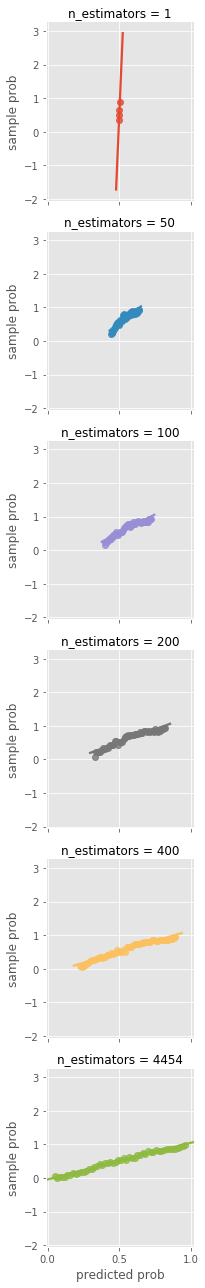

In [55]:
plt.rcParams['figure.figsize'] = (3,3)
import seaborn as sns 
totalFrame.columns = ['predicted prob', 'sample prob', 'n_estimators']
g = sns.FacetGrid(data=totalFrame, row = 'n_estimators', hue = 'n_estimators')
g.map(sns.regplot, 'predicted prob', 'sample prob')

- The above motion picture demonstrates that at the beginning (n_estimators = 1) the model estimates the probabilities poorly
- As we add more and more trees to the boosted model, the slopes of sample probabilities vs estimated probabilities approach 1
- We also notice that the range of estimated probabilities grow from a small range near 0.5 to the full range (0,1)

## How Does a GBM Predicted Default Rates Variation as a Function of a Specified Feature Depend on the n_estimators?

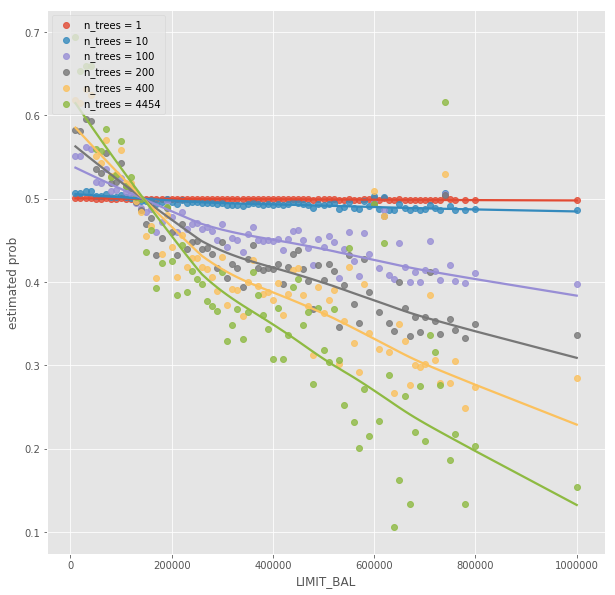

In [56]:
plt.rcParams['figure.figsize'] = (10,10)

gen_proba = gbm_c.staged_predict_proba(X)

token = 'LIMIT_BAL'
steps = [1,10, 100, 200, 400, gbm_c.n_estimators]

for n_estimators in range(1, gbm_c.n_estimators+1):
        prob = next(gen_proba)
        if n_estimators not in steps: continue
            
        indep = cards2[token]   
        U = pd.DataFrame({token:indep, 'bins':pd.cut(indep,100,labels=False), 'estimated prob':prob[:,1]})
        W = U.groupby('bins').mean()
        sns.regplot(data = W, x = token, y='estimated prob', label='n_trees = %d' %(n_estimators), lowess=True)
plt.legend(loc=2)  